# Taylor Series Expansion

## Theoretical Foundation

The Taylor series is a fundamental tool in mathematical analysis that allows us to represent smooth functions as infinite sums of polynomial terms. Named after Brook Taylor, who introduced it in 1715, this expansion provides a powerful method for approximating functions, solving differential equations, and understanding the local behavior of functions.

### Definition

For a function $f(x)$ that is infinitely differentiable at a point $a$, the Taylor series expansion is:

$$f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(a)}{n!}(x-a)^n$$

Expanding this sum explicitly:

$$f(x) = f(a) + f'(a)(x-a) + \frac{f''(a)}{2!}(x-a)^2 + \frac{f'''(a)}{3!}(x-a)^3 + \cdots$$

When $a = 0$, this is called the **Maclaurin series**:

$$f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(0)}{n!}x^n$$

### Taylor's Theorem with Remainder

The $n$-th degree Taylor polynomial is:

$$P_n(x) = \sum_{k=0}^{n} \frac{f^{(k)}(a)}{k!}(x-a)^k$$

The error (remainder) after $n$ terms is given by the Lagrange form:

$$R_n(x) = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-a)^{n+1}$$

where $\xi$ is some value between $a$ and $x$.

### Important Taylor Series

Several fundamental functions have well-known Maclaurin series:

**Exponential function:**
$$e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \cdots$$

**Sine function:**
$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \cdots$$

**Cosine function:**
$$\cos(x) = \sum_{n=0}^{\infty} \frac{(-1)^n x^{2n}}{(2n)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \cdots$$

**Natural logarithm (for $|x| < 1$):**
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n+1} x^n}{n} = x - \frac{x^2}{2} + \frac{x^3}{3} - \cdots$$

### Convergence

The radius of convergence $R$ determines where the series converges to the function. It can be found using the ratio test:

$$R = \lim_{n \to \infty} \left| \frac{a_n}{a_{n+1}} \right|$$

The series converges absolutely for $|x - a| < R$ and diverges for $|x - a| > R$.

## Computational Implementation

We will implement Taylor series approximations for several functions and visualize how the approximation improves with increasing numbers of terms.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11

### Taylor Series Implementation

We define functions to compute Taylor polynomial approximations for common functions.

In [2]:
def taylor_exp(x, n_terms):
    """
    Compute Taylor series approximation of e^x around x=0.
    
    Parameters:
        x: array-like, points at which to evaluate
        n_terms: int, number of terms in the series
    
    Returns:
        Taylor polynomial approximation
    """
    result = np.zeros_like(x, dtype=float)
    for n in range(n_terms):
        result += x**n / factorial(n)
    return result


def taylor_sin(x, n_terms):
    """
    Compute Taylor series approximation of sin(x) around x=0.
    
    Parameters:
        x: array-like, points at which to evaluate
        n_terms: int, number of terms in the series
    
    Returns:
        Taylor polynomial approximation
    """
    result = np.zeros_like(x, dtype=float)
    for n in range(n_terms):
        result += ((-1)**n * x**(2*n + 1)) / factorial(2*n + 1)
    return result


def taylor_cos(x, n_terms):
    """
    Compute Taylor series approximation of cos(x) around x=0.
    
    Parameters:
        x: array-like, points at which to evaluate
        n_terms: int, number of terms in the series
    
    Returns:
        Taylor polynomial approximation
    """
    result = np.zeros_like(x, dtype=float)
    for n in range(n_terms):
        result += ((-1)**n * x**(2*n)) / factorial(2*n)
    return result


def taylor_ln(x, n_terms):
    """
    Compute Taylor series approximation of ln(1+x) around x=0.
    
    Parameters:
        x: array-like, points at which to evaluate
        n_terms: int, number of terms in the series
    
    Returns:
        Taylor polynomial approximation
    """
    result = np.zeros_like(x, dtype=float)
    for n in range(1, n_terms + 1):
        result += ((-1)**(n+1) * x**n) / n
    return result

### Visualization of Taylor Series Convergence

We now visualize how Taylor polynomials of increasing degree converge to the true function.

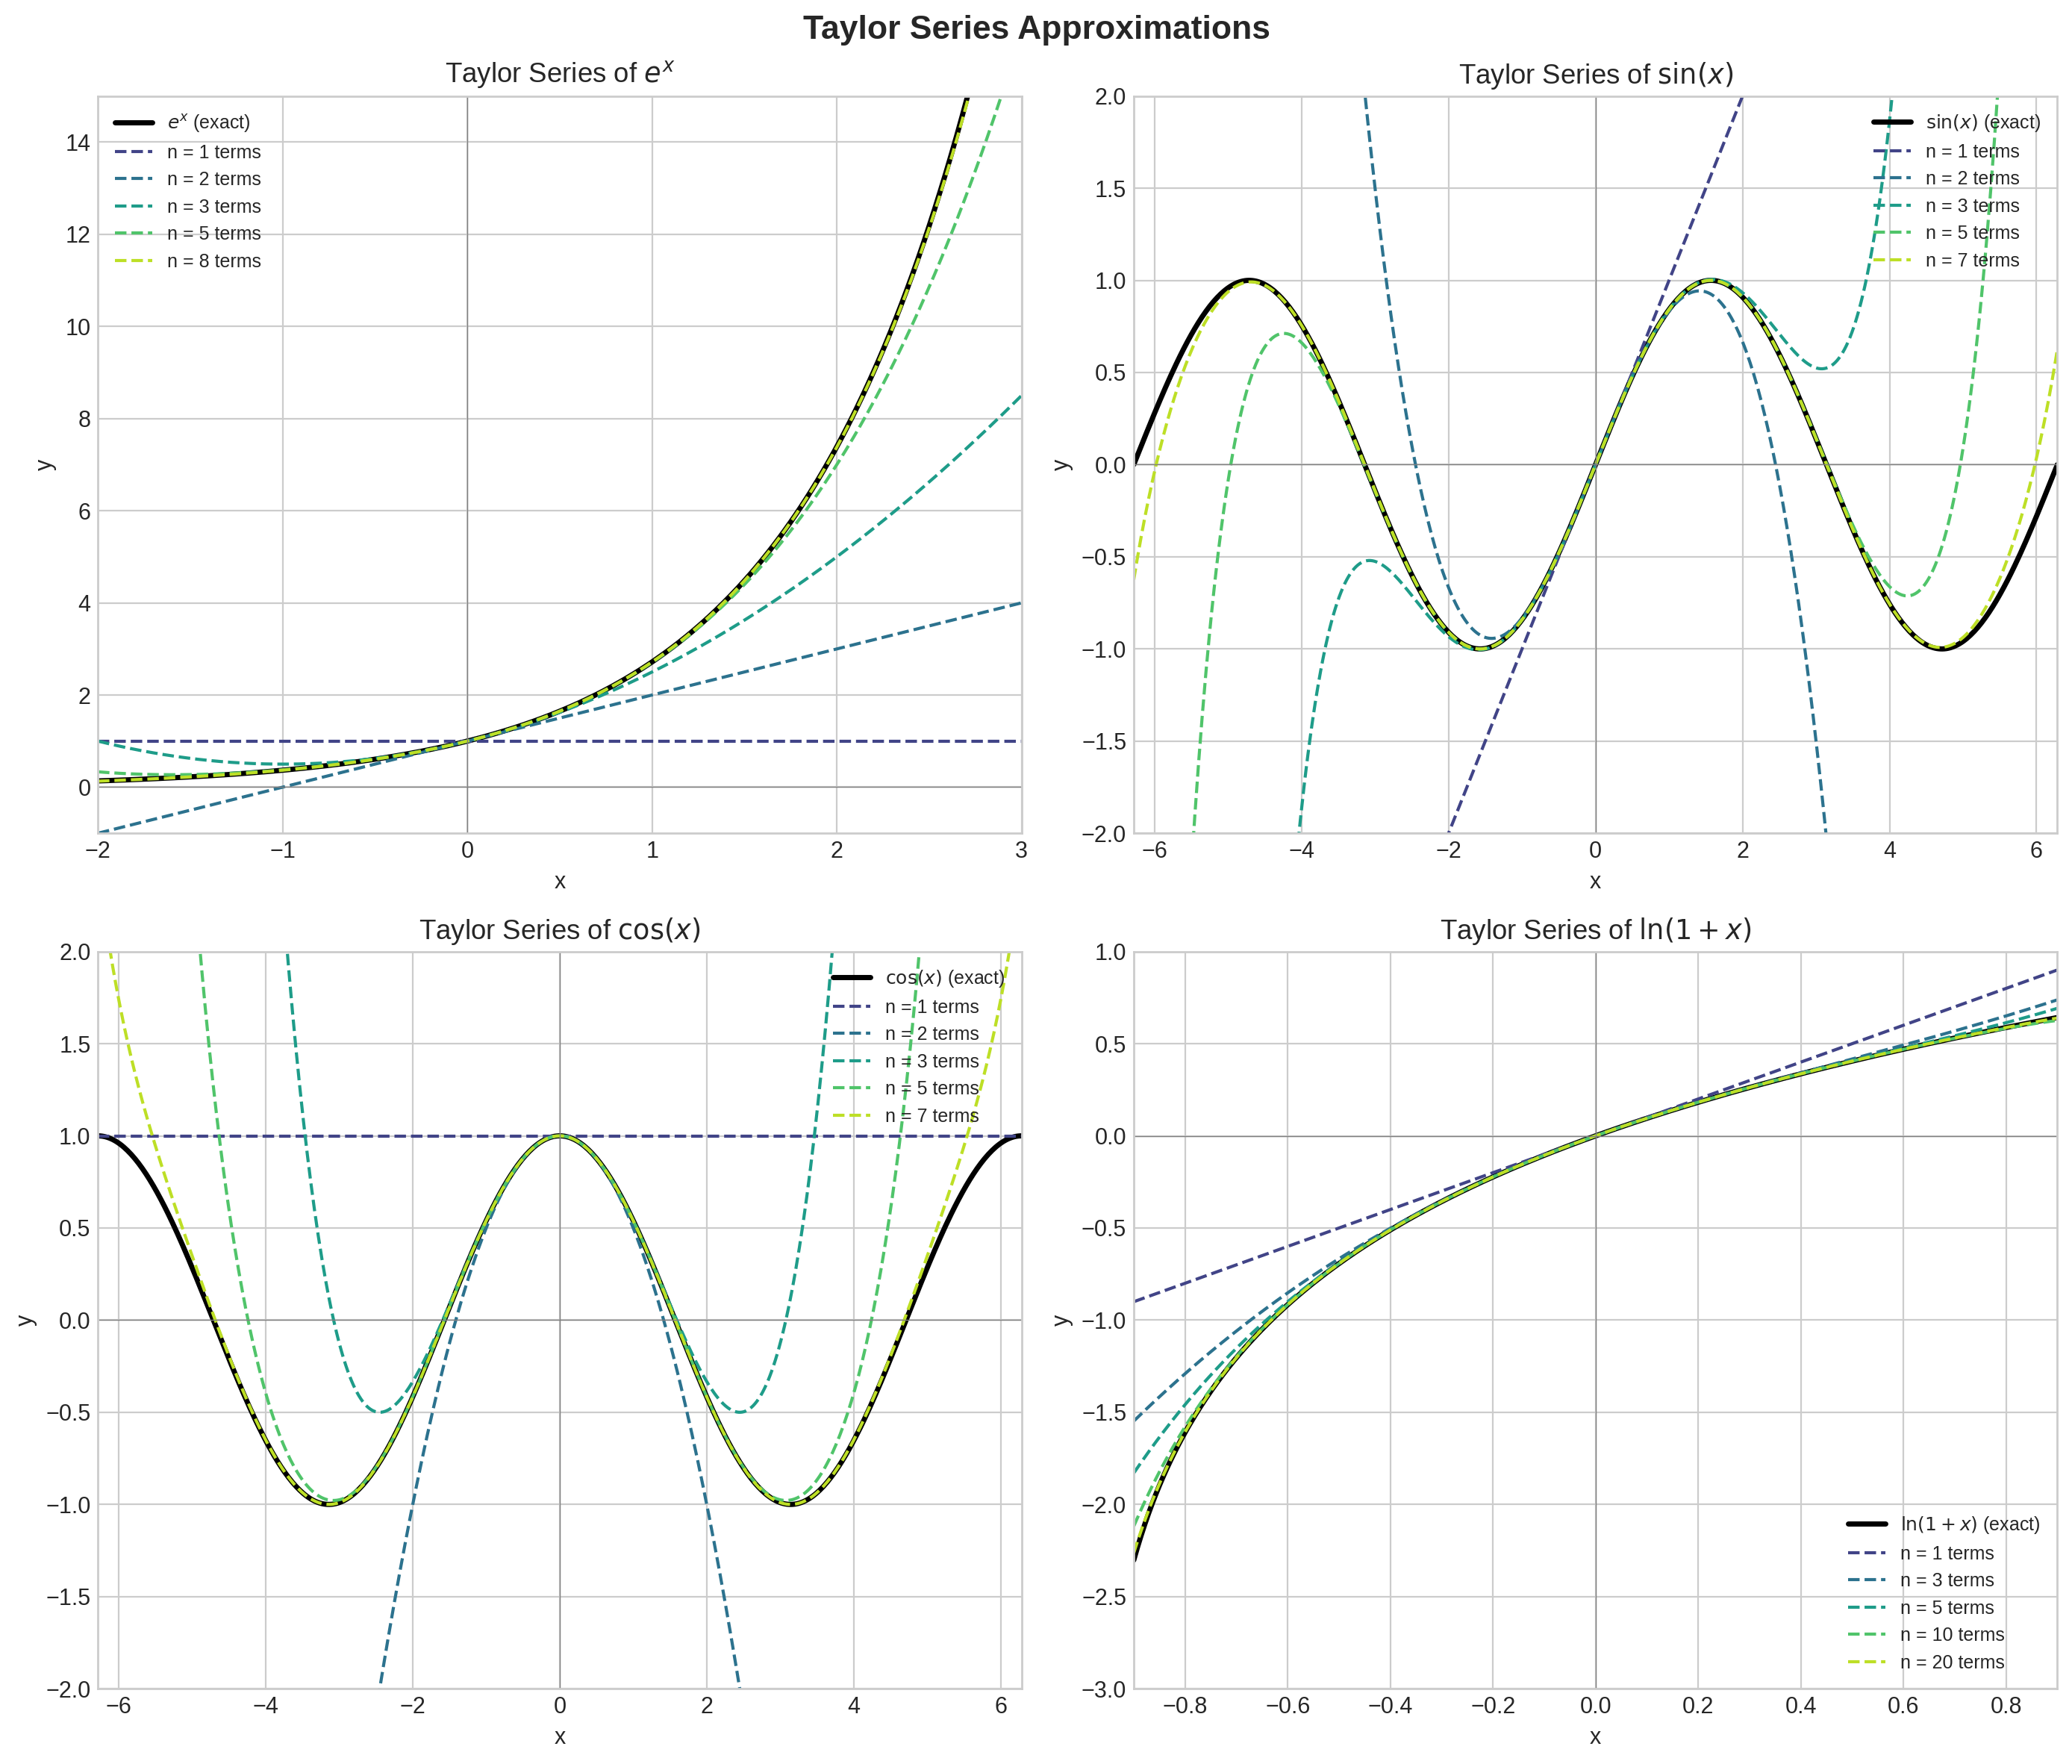

Plot saved to 'plot.png'


In [3]:
# Create figure with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Taylor Series Approximations', fontsize=16, fontweight='bold')

# Color palette for different numbers of terms
colors = plt.cm.viridis(np.linspace(0.2, 0.9, 5))

# --- Plot 1: Exponential function ---
ax1 = axes[0, 0]
x_exp = np.linspace(-2, 3, 500)
ax1.plot(x_exp, np.exp(x_exp), 'k-', linewidth=2.5, label=r'$e^x$ (exact)')

for i, n in enumerate([1, 2, 3, 5, 8]):
    y_taylor = taylor_exp(x_exp, n)
    ax1.plot(x_exp, y_taylor, '--', color=colors[i], linewidth=1.5, 
             label=f'n = {n} terms')

ax1.set_xlim(-2, 3)
ax1.set_ylim(-1, 15)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title(r'Taylor Series of $e^x$')
ax1.legend(loc='upper left', fontsize=9)
ax1.axhline(y=0, color='gray', linewidth=0.5)
ax1.axvline(x=0, color='gray', linewidth=0.5)

# --- Plot 2: Sine function ---
ax2 = axes[0, 1]
x_sin = np.linspace(-2*np.pi, 2*np.pi, 500)
ax2.plot(x_sin, np.sin(x_sin), 'k-', linewidth=2.5, label=r'$\sin(x)$ (exact)')

for i, n in enumerate([1, 2, 3, 5, 7]):
    y_taylor = taylor_sin(x_sin, n)
    ax2.plot(x_sin, y_taylor, '--', color=colors[i], linewidth=1.5, 
             label=f'n = {n} terms')

ax2.set_xlim(-2*np.pi, 2*np.pi)
ax2.set_ylim(-2, 2)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title(r'Taylor Series of $\sin(x)$')
ax2.legend(loc='upper right', fontsize=9)
ax2.axhline(y=0, color='gray', linewidth=0.5)
ax2.axvline(x=0, color='gray', linewidth=0.5)

# --- Plot 3: Cosine function ---
ax3 = axes[1, 0]
x_cos = np.linspace(-2*np.pi, 2*np.pi, 500)
ax3.plot(x_cos, np.cos(x_cos), 'k-', linewidth=2.5, label=r'$\cos(x)$ (exact)')

for i, n in enumerate([1, 2, 3, 5, 7]):
    y_taylor = taylor_cos(x_cos, n)
    ax3.plot(x_cos, y_taylor, '--', color=colors[i], linewidth=1.5, 
             label=f'n = {n} terms')

ax3.set_xlim(-2*np.pi, 2*np.pi)
ax3.set_ylim(-2, 2)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_title(r'Taylor Series of $\cos(x)$')
ax3.legend(loc='upper right', fontsize=9)
ax3.axhline(y=0, color='gray', linewidth=0.5)
ax3.axvline(x=0, color='gray', linewidth=0.5)

# --- Plot 4: Natural logarithm ---
ax4 = axes[1, 1]
x_ln = np.linspace(-0.9, 0.9, 500)
ax4.plot(x_ln, np.log(1 + x_ln), 'k-', linewidth=2.5, label=r'$\ln(1+x)$ (exact)')

for i, n in enumerate([1, 3, 5, 10, 20]):
    y_taylor = taylor_ln(x_ln, n)
    ax4.plot(x_ln, y_taylor, '--', color=colors[i], linewidth=1.5, 
             label=f'n = {n} terms')

ax4.set_xlim(-0.9, 0.9)
ax4.set_ylim(-3, 1)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_title(r'Taylor Series of $\ln(1+x)$')
ax4.legend(loc='lower right', fontsize=9)
ax4.axhline(y=0, color='gray', linewidth=0.5)
ax4.axvline(x=0, color='gray', linewidth=0.5)

plt.tight_layout()
plt.savefig('taylor_series_expansion_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Error Analysis

Let us quantify the approximation error as a function of the number of terms and the distance from the expansion point.

In [4]:
# Compute maximum absolute error for sin(x) in different intervals
def compute_max_error(func_exact, func_taylor, x_range, n_terms):
    """
    Compute maximum absolute error of Taylor approximation.
    """
    x = np.linspace(x_range[0], x_range[1], 1000)
    exact = func_exact(x)
    approx = func_taylor(x, n_terms)
    return np.max(np.abs(exact - approx))


# Analyze error for sin(x)
terms_range = range(1, 11)
intervals = [(-1, 1), (-2, 2), (-np.pi, np.pi)]
interval_labels = ['[-1, 1]', '[-2, 2]', r'$[-\pi, \pi]$']

print("Maximum Absolute Error for sin(x) Taylor Approximation")
print("=" * 60)
print(f"{'Terms':<8}", end="")
for label in interval_labels:
    print(f"{label:<18}", end="")
print()
print("-" * 60)

for n in terms_range:
    print(f"{n:<8}", end="")
    for interval in intervals:
        error = compute_max_error(np.sin, taylor_sin, interval, n)
        print(f"{error:<18.6e}", end="")
    print()

Maximum Absolute Error for sin(x) Taylor Approximation
Terms   [-1, 1]           [-2, 2]           $[-\pi, \pi]$     
------------------------------------------------------------
1       1.585290e-01      1.090703e+00      3.141593e+00      
2       8.137651e-03      2.426308e-01      2.026120e+00      
3       1.956819e-04      2.403591e-02      5.240439e-01      
4       2.730840e-06      1.360919e-03      7.522062e-02      
5       2.489228e-08      5.001586e-05      6.925271e-03      
6       1.598285e-10      1.290863e-06      4.451602e-04      
7       7.619461e-13      2.469399e-08      2.114257e-05      
8       2.775558e-15      3.642341e-10      7.727859e-07      
9       2.220446e-16      4.269252e-12      2.241951e-08      
10      2.220446e-16      4.074519e-14      5.289184e-10      


## Conclusion

This notebook demonstrated the Taylor series expansion, a cornerstone of mathematical analysis. Key observations:

1. **Convergence near expansion point**: Taylor polynomials provide excellent approximations near $x = a$, with accuracy improving as more terms are added.

2. **Radius of convergence**: The approximation quality degrades outside the radius of convergence, as seen with $\ln(1+x)$ which diverges for $|x| \geq 1$.

3. **Alternating series**: Functions like $\sin(x)$ and $\cos(x)$ have alternating series that converge throughout $\mathbb{R}$, allowing good approximations even far from the origin with sufficient terms.

4. **Practical applications**: Taylor series are essential in numerical methods, physics (small angle approximations), and machine learning (gradient descent relies on first-order Taylor expansion).